In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load mpg dataset and prepare for classification

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df['origin_simple'] = df.origin.map({'europe' : 'non-usa', 'japan' : 'non-usa', 'usa':'usa'})

# Data Understanding: Features and Target Visualization
We use only mpg and weight as features in the beginning.

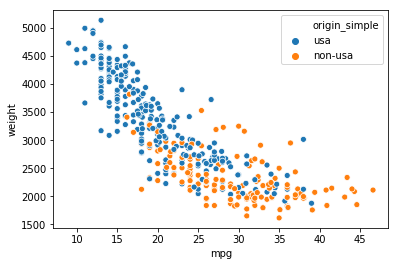

In [4]:
sns.scatterplot(data=df, x='mpg', y='weight', hue='origin_simple'); plt.show()

# Preparation
## Remove Null-Values

In [5]:
df = df.dropna()

# ML-preparation: Features and Target

In [6]:
#X = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
X = df[['mpg', 'weight']]
y = df['origin_simple']

# Search for Optimal Parameter by Grid Search

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = SVC()

# define the parameter grid
# the pipeline stage is followed by two underscores "__" and then the parameter to be varied is named (as key)
# the value is a list of parameter values to be searched
param_grid = [
    {'kernel': ['linear'],
     'gamma' : ['auto']
    }
]

search = GridSearchCV(clf, param_grid, cv=2)

search.fit(X, y)
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter (CV score=0.71):{'gamma': 'auto', 'kernel': 'linear'})


## Visualize Results of Grid-Search

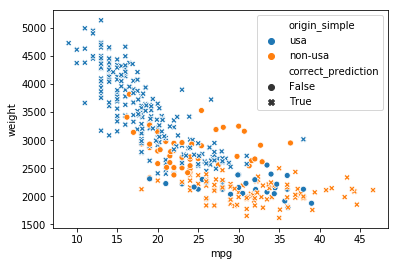

In [9]:
df_viz = pd.DataFrame(X).copy()
df_viz['origin_simple'] = y
df_viz['prediction'] = search.predict(X)
df_viz['correct_prediction'] = (df_viz.origin_simple == df_viz.prediction)
sns.scatterplot(data=df_viz, x='mpg', y='weight', hue='origin_simple', style='correct_prediction'); plt.show()

# Add further features

In [10]:
X_all_features = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y_all_features = df['origin']

In [11]:
clf = SVC(gamma='auto', kernel='linear')

search_all_features = GridSearchCV(clf, param_grid, cv=2)
search_all_features.fit(X_all_features, y_all_features)
print("Best parameter (CV score={:.2f}):{})".format(search_all_features.best_score_, search.best_params_))

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter (CV score=0.67):{'gamma': 'auto', 'kernel': 'linear'})


# Classifying non-linear data with SVMs
Creation of a further feature in a higher-dimensional space.

In [20]:

X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 


In [23]:
clf = SVC()

# define the parameter grid
# the pipeline stage is followed by two underscores "__" and then the parameter to be varied is named (as key)
# the value is a list of parameter values to be searched
param_grid = [
    {'kernel': ['linear'],
     'gamma' : ['auto']
    }
]

search = GridSearchCV(clf, param_grid, cv=2)

search.fit(X, y)
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

Best parameter (CV score=0.67):{'gamma': 'auto', 'kernel': 'linear'})


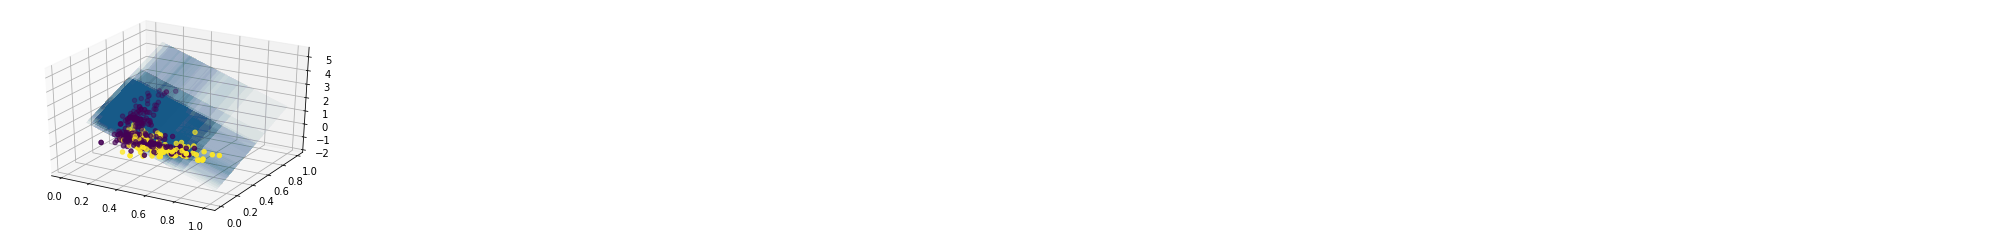

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
# create support vector classifier using a linear kernel 
svc = SVC(kernel = 'linear', gamma='auto') 
svc.fit(X, y) 
w = svc.coef_ 
b = svc.intercept_ 
  
# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 
  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 

This is the "kernel trick".

# Visualization of the Decision Boundary

In [28]:
from sklearn.preprocessing import MinMaxScaler  # in order to understand the decision boundary, we'll normalize our data
X = MinMaxScaler().fit_transform(df[['mpg', 'horsepower']])
y = df['origin_simple'].map({'usa':1, 'non-usa':2})  # the visualization below cannot work with nominal values

clf_arr = []  # this array holds the knn-predictors
clf_name_arr = []  # this array holds the names of the knn-predictors for visualization


clf1 = SVC(gamma='auto', kernel='linear')
clf1.fit(X, y)
clf_arr.append(clf1)
clf_name_arr.append("Linear SVM (linear kernel)")

clf2 = SVC(gamma='auto', kernel='poly', degree=2)
clf2.fit(X, y)
clf_arr.append(clf2)
clf_name_arr.append("Non-Linear SVM (polynomial kernel, degree 2)")

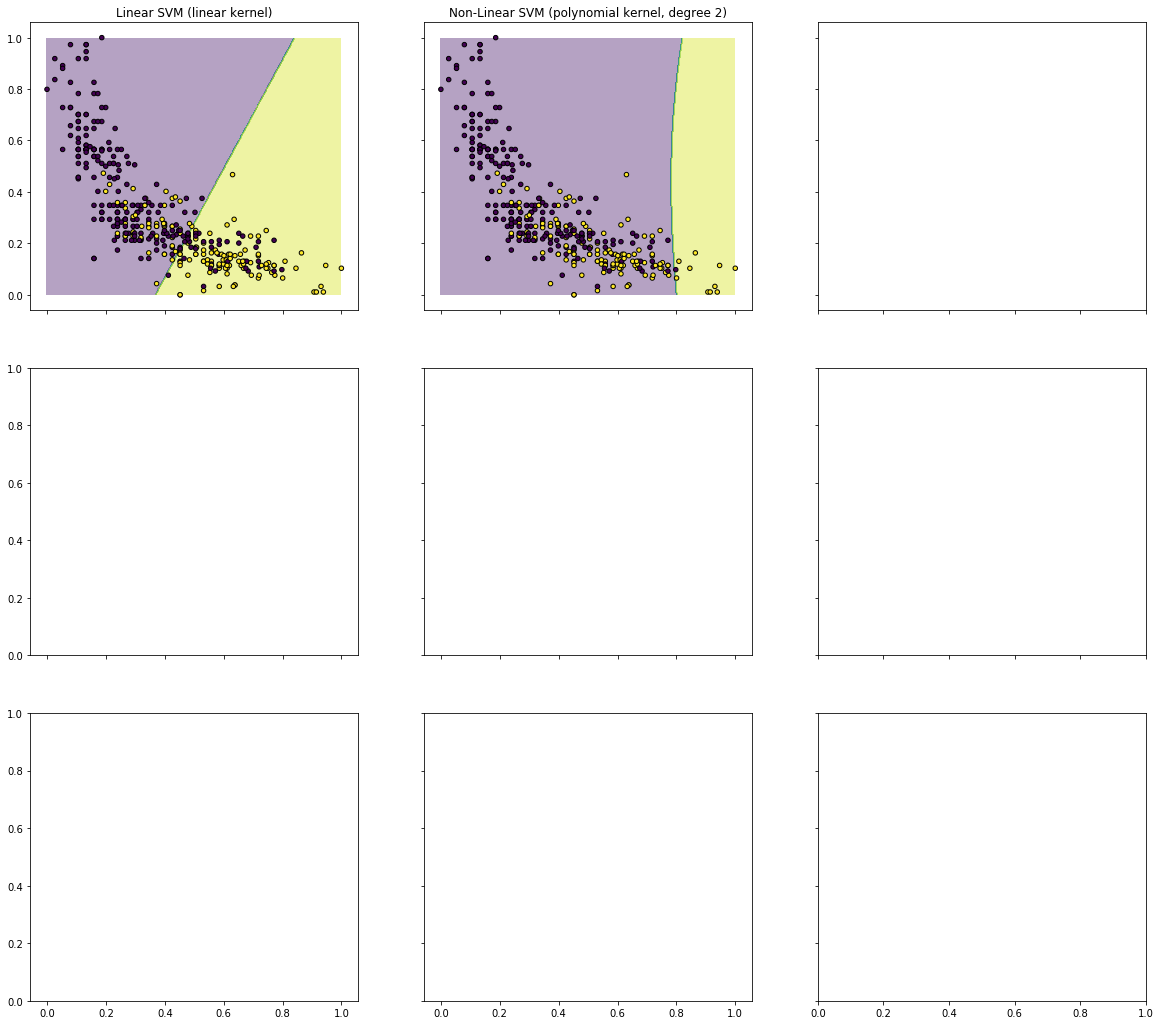

In [27]:
# for the approach, see https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

from itertools import product

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min(), X[:, 0].max()  # this is always 0,1 if MinMaxSclaer is used
y_min, y_max = X[:, 1].min(), X[:, 1].max() # this is always 0,1 if MinMaxSclaer is used
steps = 300  # --> looks better if larger
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/steps),
                     np.arange(y_min, y_max, (y_max-y_min)/steps))  


f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 18))

# for each model, create the decision boundary and plot it into the right sub-plot (via idx)
for idx, clf, tt in zip(product([0,1,2], [0,1,2]), clf_arr, clf_name_arr):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # predict the mesh
       
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)  # draw decision boundary
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # plot the original data (normalized)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()